# First Explore and prepare data for processing

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


In [8]:
# Load the dataset
df = pd.read_csv('../data/amazon_reviews.csv')

# Display the first few rows of the dataset to understand its structure
df

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551154,Greg,True,Pandahall 10m(32.80 feet) Platinum Color Iron ...,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,"['Iron Twist Chains, Platinum Color, Ring: abo...",Arts_Crafts_and_Sewing,$8.29,2.0,2018-10-03,Two Stars,Cheap price but weak chain.,0
551155,Gayle LaRue,True,Keter Westwood Plastic Deck Storage Container ...,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,['Outside Dimensions: 61 in. L x 28.5 in. W x ...,Patio_Lawn_and_Garden,$121.76,4.0,2018-10-03,Deck box good investment,Great deck box,0
551156,Alfred D. Wallace,True,AcuRite 06052M Remote Battery Pack for 5-in-1 ...,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,['Makes battery replacement easy for AcuRite 5...,Patio_Lawn_and_Garden,$19.95,5.0,2018-10-03,This will keep the old man off the roof!,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,True,Keter Unity XL Indoor Outdoor Entertainment BB...,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...,Patio_Lawn_and_Garden,$155.64,5.0,2018-10-03,EASY TO ASSEMBLE AND WORKS WELL NEXT TO GRILL,This is a nice quality grilling table where yo...,0


In [9]:
# better explore
def check_df(df: pd.DataFrame, outliers_degree=2) -> pd.DataFrame:
    """ Show for each column - how many unique values nad data """
    fields = []
    for column in df.columns:
        non_na_values = df[column].dropna()
        d_type = df[column].dtypes
        c_type = 'other'
        if pd.api.types.is_numeric_dtype(df[column]):   # Type of field
            c_type = 'numeric'
        elif pd.api.types.is_string_dtype(df[column]) :
            c_type = 'string'
        unique = df[column].nunique()   # how many unique values
        nulls = df[column].isnull().sum() / len(df) # % of nulls for column
        mean_freq = df[column].dropna().mean() if c_type == 'numeric' else df[column].dropna().mode()[0] # mean (numeric), frequent for (string)
        median = df[column].dropna().median() if c_type == 'numeric' else None # median (numeric)
        std = df[column].dropna().std() if c_type == 'numeric' else None    # std (numeric)
        values, outliers, n_entropy = None, None, None
        if c_type == 'numeric':
            values = [non_na_values.min(), non_na_values.max()]    # min_max_or_categories (numeric)
            try:
                z_scores = np.abs(stats.zscore(non_na_values))
                # outliers = len(df[np.abs(z_scores) > outliers_degree]) / len(df)   # outliers (numeric)
                outliers = (z_scores > outliers_degree).sum() / len(df)   # outliers (numeric)
            except TypeError as e:
                print(f"Error calculating z-scores for column {column}: {e}")

        elif c_type == 'string':     # normalized entropy for categorical (string)
            values = {category: i for i, category in enumerate(df[column].dropna().unique())} # min_max_or_categories (categorical)
            probabilities = df[column].dropna().value_counts() / len(df)
            n_entropy = -np.sum(probabilities * np.log2(probabilities)) / np.log2(len(df[column].value_counts()))
        fields.append([column, d_type, c_type, unique, nulls, mean_freq, median, std, n_entropy, outliers, values])

    c_df = pd.DataFrame(fields, columns=['name', 'd_type', 'c_type', 'unique', '%_nulls', 'mean_freq',
                                            'median', 'std', 'n_entropy', 'outliers_%', 'min_max_or_categories'])
    return c_df

guide_df = check_df(df)
guide_df

,name,d_type,c_type,unique,%_nulls,mean_freq,median,std,n_entropy,outliers_%,min_max_or_categories
0,userName,object,other,131182,0.000241,Amazon Customer,NaN,NaN,NaN,NaN,None
1,verified,bool,numeric,2,0.000000,0.950325,1.0,0.217273,NaN,0.049675,"[False, True]"
2,itemName,object,other,109009,0.000002,Puppia Dog Harnesses,NaN,NaN,NaN,NaN,None
3,description,object,other,93335,0.000015,[],NaN,NaN,NaN,NaN,None
4,image,object,string,86736,0.000000,[],NaN,NaN,0.841075,NaN,{'['https://images-na.ssl-images-amazon.com/im...
5,brand,object,other,24640,0.007025,KONG,NaN,NaN,NaN,NaN,None
6,feature,object,string,78944,0.000000,[],NaN,NaN,0.774946,NaN,"{'[]': 0, '['Features Bright Pink Lemonade pat..."
7,category,object,string,16,0.000000,Pet_Supplies,NaN,NaN,0.699177,NaN,"{'Prime_Pantry': 0, 'Grocery_and_Gourmet_Food'..."
8,price,object,other,7667,0.134869,$9.99,NaN,NaN,NaN,NaN,None
9,rating,float64,numeric,5,0.000000,4.345191,5.0,1.170084,NaN,0.104206,"[1.0, 5.0]"


# For the work we will use those fields

size - ~550k reviews 

userName - String, 131k unique, not seems to contribute to rating 
verified - Bool, if the buy is verified, can contribute - YES
itemName - String, 109k unique, not seems to contribute to rating  
description - String, 93k unique, might have some connectino to to rating
image - Strig, 86k unique, not seems to contribute to rating
brand - String, 24K unique, may have some connectino to to rating
feature - String, 78K unique, may have some connectino to to rating
category - String, 16 unique, can contribute - YES
price - String, 7k unique, with $ sign, can contribute - YES
reviewTime - String, 277 unique, not seems to contribute to rating
summary - String, 256k unique, may have some connectino to to rating
reviewText - String, 419k unique, the main even for ratings
vote - int, 89 unique, not seems to contribute to rating
rating - float, 5 unique values - the main target

In [10]:
# Remove columns that won't realy help us 

columns_to_drop = ['userName', 'itemName', 'description', 'image', 'brand', 'feature', 'reviewTime', 'summary', 'vote']
df = df.drop(columns=columns_to_drop, axis=1)
df.head()

,verified,category,price,rating,reviewText
0,True,Prime_Pantry,$1.63,5.0,super smooth and yummy with crunchy bits
1,True,Grocery_and_Gourmet_Food,$6.40,5.0,Perfect for kombucha
2,True,Pet_Supplies,$7.99,5.0,Finally a harness that fits my puppy. I really...
3,False,Arts_Crafts_and_Sewing,$14.18,5.0,I LOVE THEM!! I bought them at Micheals our of...
4,True,Office_Products,NaN,5.0,"I love this pen! I love the shape of it, the f..."


In [27]:
# textReview focus
random_rows = df.sample(n=20)
# Select 'reviewText' and 'rating' columns from these rows
df_selected = random_rows[['reviewText', 'rating']]
# Adjust the display option
pd.set_option('display.max_colwidth', 120)
# Apply styling for text alignment to the left (optional)
df_styled = df_selected.style.set_properties(**{'text-align': 'left'})
df_styled

,reviewText,rating
191098,Useful,5.000000
5423,"Normally I love Memento ink, but this one is splotchy and uneven. I will keep trying.",3.000000
423263,"Great product but these are $2.59 at my local Kroger. Come on Amazon, you're supposed to be cheaper! These are perfect for my sons lunch he cant use a knife yet to put on his banana and apple at school so despite the littering packaging its what we really need right now at this stage of preschool.",4.000000
233277,grate,5.000000
201841,"Gamer family, Assassins Creed gives a lot of story line, history and is lots of fun. We have the whole collection.",5.000000
468534,nice taste but was too much sugar,4.000000
490719,perfect for price.,5.000000
369519,Very pleased,5.000000
227065,"Works as advertised, i replaced my Epi LP Special ll standard tuners...had to drill new holes, posts are taller.",5.000000
453262,"This will be our new dog food. After feeding raw, I hated to cave and feed kibble again but we got another dog and it was too much work to stay with raw. This food is the next best thing. Our dogs love it and I see no difference in their stool than I did with raw. I feel good about feeding this food to our boys. I give them a piece of liver with it occasionally. I thought it was pricey but after feeding it, it lasts longer than I thought. We want the best for our boys.",5.000000


In [40]:
# category, verified, price focus
random_rows = df.sample(n=20)
# Select 'reviewText' and 'rating' columns from these rows
df_selected = random_rows[['category', 'price', 'verified', 'rating']]
# Adjust the display option
pd.set_option('display.max_colwidth', 120)
# Apply styling for text alignment to the left (optional)
df_styled = df_selected.style.set_properties(**{'text-align': 'left'})
df_styled

,category,price,verified,rating
484074,Prime_Pantry,$4.47,True,4.000000
65689,Pet_Supplies,$8.99,True,5.000000
151533,Pet_Supplies,$2.99,True,1.000000
538135,Grocery_and_Gourmet_Food,$29.95,True,2.000000
127016,Pet_Supplies,nan,True,1.000000
235441,Grocery_and_Gourmet_Food,nan,True,5.000000
215889,Pet_Supplies,$13.29,True,3.000000
429527,Patio_Lawn_and_Garden,$21.44,True,1.000000
92604,Patio_Lawn_and_Garden,$11.98,True,5.000000
495017,Patio_Lawn_and_Garden,nan,False,4.000000


In [41]:
# Handle Duplicates
df_len = len(df)
df = df.drop_duplicates(keep='first')
print(f"There are {(df_len - len(df)) / df_len * 100}% duplicates, removed")

There are 9.972258458992778% duplicates, removed


In [42]:
# Verified
df['verified'] = df['verified'].astype(int)

In [55]:
# Price

# df_selected['price'] = df_selected['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
# df_selected['price'].fillna(df_selected['price'].mean(), inplace=True)
non_matching_cells = df['price'].dropna()[~df['price'].dropna().str.match(r'^\$?\d+(\.\d+)?$')]
random_non_matching_cells = non_matching_cells.sample(n=10, replace=True)
random_non_matching_cells

ValueError: a must be greater than 0 unless no samples are taken

In [56]:
len(non_matching_cells)

0

In [54]:
# move price to na

mask = df['price'].notna() & ~df['price'].str.match(r'^\$?\d+(\.\d+)?$').fillna(True)
df.loc[mask, 'price'] = pd.NA

/tmp/ipykernel_314083/3729686483.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = df['price'].notna() & ~df['price'].str.match(r'^\$?\d+(\.\d+)?$').fillna(True)


In [57]:
# Price - now move to float
df['price'] = df['price'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [58]:
empty_count = df['price'].isna().sum() + df['price'].eq('').sum()
empty_count

75036

In [60]:
# Price - fill na with mean
df_selected['price'] = pd.to_numeric(df_selected['price'], errors='coerce')
df_selected['price'].fillna(df_selected['price'].mean(), inplace=True)

/tmp/ipykernel_314083/4199703399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['price'] = pd.to_numeric(df_selected['price'], errors='coerce')
/tmp/ipykernel_314083/4199703399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['price'].fillna(df_selected['p

In [67]:
df.head()

,verified,category,price,rating,reviewText
0,1,Prime_Pantry,1.63,5,super smooth and yummy with crunchy bits
1,1,Grocery_and_Gourmet_Food,6.40,5,Perfect for kombucha
2,1,Pet_Supplies,7.99,5,Finally a harness that fits my puppy. I really was in need of a harness that fits my 7 pound pug Chihuahua mix.she h...
3,0,Arts_Crafts_and_Sewing,14.18,5,I LOVE THEM!! I bought them at Micheals our of curiosity and wanting to try a different colored pencil. I own Crayol...
4,1,Office_Products,NaN,5,"I love this pen! I love the shape of it, the feel of it, the weight of it, and the color of it. I can highly recomme..."


In [66]:
# convert 'rating' to int
df['rating'] = df['rating'].astype(int)

In [68]:
# Calculate the Pearson correlation coefficient between 'price' and 'rating'
correlation = df[['price', 'rating']].corr().loc['price', 'rating']

correlation

-0.0029685055688718066

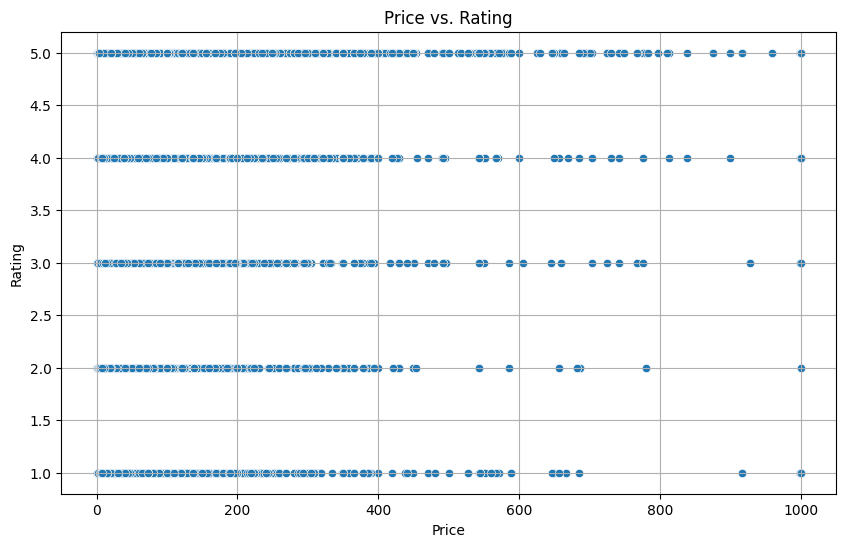

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered contains the 'price' and 'rating' columns without NaN values
# Plotting the relationship between 'price' and 'rating' to visualize any potential correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df)

plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [71]:
# good bye price
df.drop(columns='price', inplace=True)

In [72]:
df.head()

,verified,category,rating,reviewText
0,1,Prime_Pantry,5,super smooth and yummy with crunchy bits
1,1,Grocery_and_Gourmet_Food,5,Perfect for kombucha
2,1,Pet_Supplies,5,Finally a harness that fits my puppy. I really was in need of a harness that fits my 7 pound pug Chihuahua mix.she h...
3,0,Arts_Crafts_and_Sewing,5,I LOVE THEM!! I bought them at Micheals our of curiosity and wanting to try a different colored pencil. I own Crayol...
4,1,Office_Products,5,"I love this pen! I love the shape of it, the feel of it, the weight of it, and the color of it. I can highly recomme..."


In [74]:
# Verified, should we use it?
# Calculate the Pearson correlation coefficient between 'price' and 'rating'
correlation = df[['verified', 'rating']].corr().loc['verified', 'rating']

correlation

0.06549039489689133

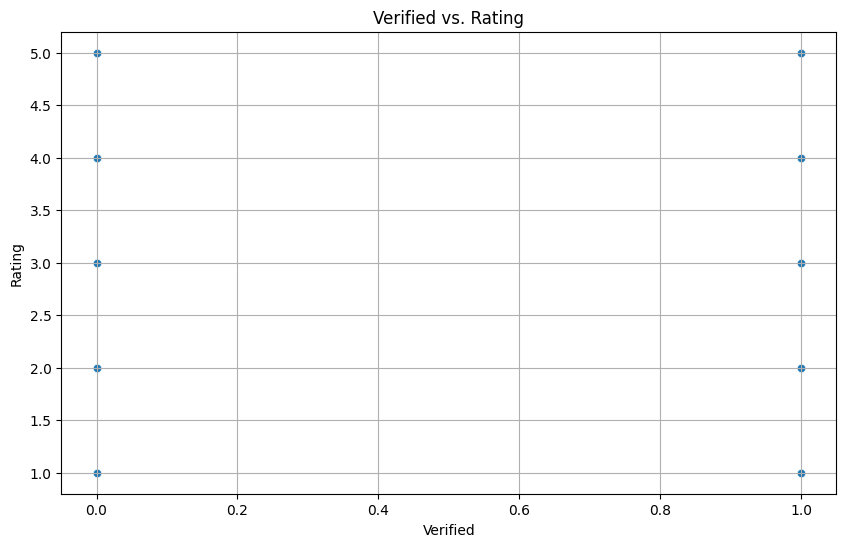

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered contains the 'price' and 'rating' columns without NaN values
# Plotting the relationship between 'price' and 'rating' to visualize any potential correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x='verified', y='rating', data=df)

plt.title('Verified vs. Rating')
plt.xlabel('Verified')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [77]:
# good bye verified
df.drop(columns='verified', inplace=True)

In [78]:
#  'category' start with dict
codes, uniques = pd.factorize(df['category'])
category_to_int = dict(zip(uniques, range(len(uniques))))
category_to_int

{'Prime_Pantry': 0,
 'Grocery_and_Gourmet_Food': 1,
 'Pet_Supplies': 2,
 'Arts_Crafts_and_Sewing': 3,
 'Office_Products': 4,
 'Cell_Phones_and_Accessories': 5,
 'Video_Games': 6,
 'Patio_Lawn_and_Garden': 7,
 'Software': 8,
 'Musical_Instruments': 9,
 'Industrial_and_Scientific': 10,
 'Luxury_Beauty': 11,
 'All_Beauty': 12,
 'AMAZON_FASHION': 13,
 'Digital_Music': 14,
 'Appliances': 15}

In [81]:
df['category'] = codes

In [82]:
df.head()

,category,rating,reviewText,category_encoded
0,0,5,super smooth and yummy with crunchy bits,0
1,1,5,Perfect for kombucha,1
2,2,5,Finally a harness that fits my puppy. I really was in need of a harness that fits my 7 pound pug Chihuahua mix.she h...,2
3,3,5,I LOVE THEM!! I bought them at Micheals our of curiosity and wanting to try a different colored pencil. I own Crayol...,3
4,4,5,"I love this pen! I love the shape of it, the feel of it, the weight of it, and the color of it. I can highly recomme...",4


In [83]:
df.drop(columns='category_encoded', inplace=True)

In [84]:
# Category, should we use it?
# Calculate the Pearson correlation coefficient between 'price' and 'rating'
correlation = df[['category', 'rating']].corr().loc['category', 'rating']

correlation

-0.003978745662907449

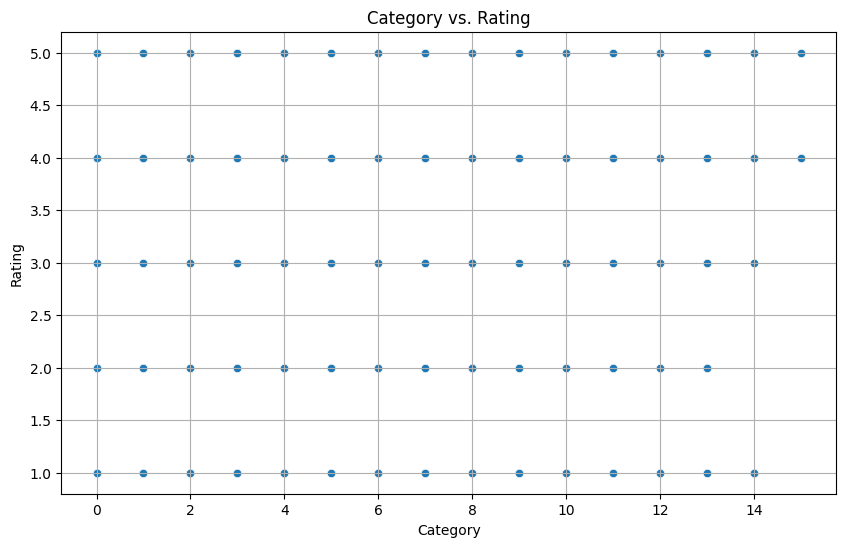

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered contains the 'price' and 'rating' columns without NaN values
# Plotting the relationship between 'price' and 'rating' to visualize any potential correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x='category', y='rating', data=df)

plt.title('Category vs. Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [87]:
# Bye bye category
df.drop(columns='category', inplace=True)

In [88]:
df.head()

,rating,reviewText
0,5,super smooth and yummy with crunchy bits
1,5,Perfect for kombucha
2,5,Finally a harness that fits my puppy. I really was in need of a harness that fits my 7 pound pug Chihuahua mix.she h...
3,5,I LOVE THEM!! I bought them at Micheals our of curiosity and wanting to try a different colored pencil. I own Crayol...
4,5,"I love this pen! I love the shape of it, the feel of it, the weight of it, and the color of it. I can highly recomme..."


In [94]:
# We are left with reviewText - explore
empty_null_count = df['reviewText'].isna().sum() + (df['reviewText'] == '').sum()
empty_null_count

0

In [93]:
df = df[df['reviewText'].notna() & (df['reviewText'] != '')]

In [95]:
shorter_than_3_letters_count = df['reviewText'].dropna().apply(lambda x: len(x) < 3).sum()
shorter_than_3_letters_count

2511

In [100]:
short_texts_df = df[df['reviewText'].dropna().apply(lambda x: len(x) < 3)]
random_short_texts = short_texts_df.sample(n=10)
random_short_texts

,rating,reviewText
64410,5,=)
258067,4,ok
455845,3,:)
449027,5,a
274308,4,ok
449148,5,:)
68908,5,A+
209908,3,Ok
160880,5,1
87994,3,Ok


In [96]:
longer_than_512_words_count = df['reviewText'].dropna().apply(lambda x: len(x.split()) > 512).sum()
longer_than_512_words_count

625

In [103]:
long_texts_df = df[df['reviewText'].dropna().apply(lambda x: len(x.split()) > 512)]
random_long_texts = long_texts_df.sample(n=10, replace=True if len(long_texts_df) < 10 else False)
random_long_texts

,rating,reviewText
472810,5,"Like any game there are pros and cons...\n\nCONS:\n1. At this point the game limits to three different types of ""Voy..."
199714,5,"Wow, what a difference a year makes. While last year's S5 took many steps in the right direction(being somewhat wate..."
436061,5,"I began playing with embroidery on a Brother PE535, but knew I'd want a larger area for bigger projects, and this wa..."
278578,3,Infamous Second Son: A PlayStation exclusive that was the first game to show off the power of the PS4 (yay) and all ...
222714,4,"The Health Warrior Chia Bar is a chewy (but compact) and seedy bar; it's not sticky at all, so it's great on the go ..."
344173,5,"Overall, a great exercise cage for an adult Syrian hamster! This cage definitely needs to be connected to another Fe..."
538061,5,"So, I've had this keyboard, for a little over a month now. I play many different types of games, but mainly fps lik..."
392052,4,"UPDATE May 17, 2018: OK, I now know with certainty how much phosphate this adds to your pool. After my experience ..."
533921,4,I'm always apprehensive when it comes to using and reviewing an expensive serum or face cream. Why? Because we all h...
530419,4,"Above-average quality build. Attractive. A couple of minor issues.\n\nFor a non-grain leather phone case, this unit ..."


In [98]:
average_length_words = df['reviewText'].dropna().apply(lambda x: len(x.split())).mean()
average_length_words

32.218540148340544

In [104]:
# stop and save the df 
df.to_csv('../data/amazon_reviews_reviewText_ratings.csv', index=False)

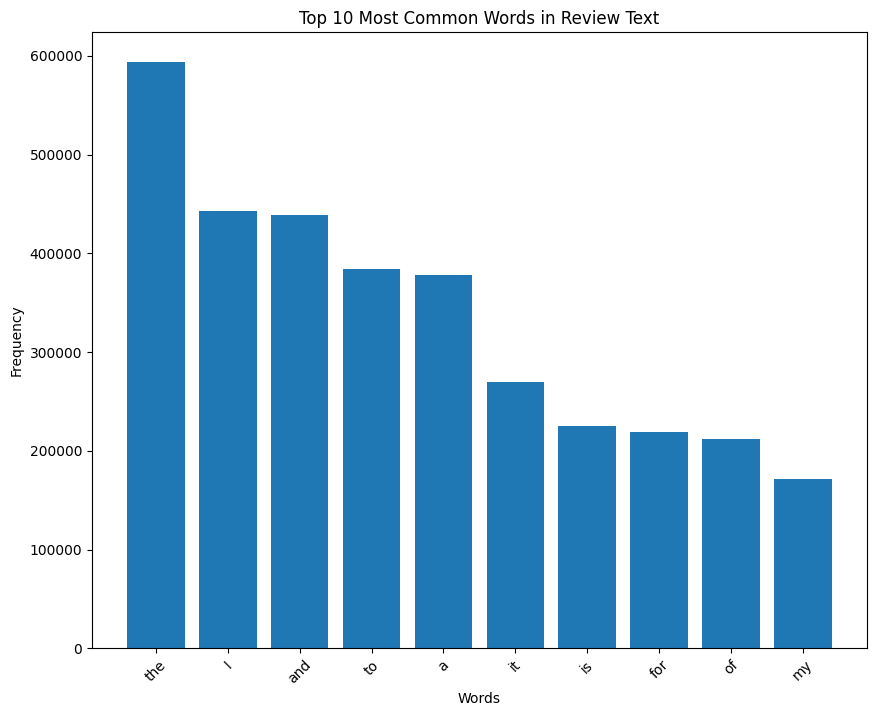

In [106]:
# reviewText - words
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming df['reviewText'] contains your text data

# Step 1: Tokenize the text and count occurrences
word_counts = Counter(" ".join(df['reviewText'].dropna()).split())

# Step 2: Most common words
most_common_words = word_counts.most_common(10)

# Step 3: Prepare data for plotting
words, counts = zip(*most_common_words)

# Step 4: Create bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Words in Review Text')
plt.show()

In [107]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords from your text
word_counts = Counter(word for word in " ".join(df['reviewText'].dropna()).lower().split() if word not in stop_words)

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


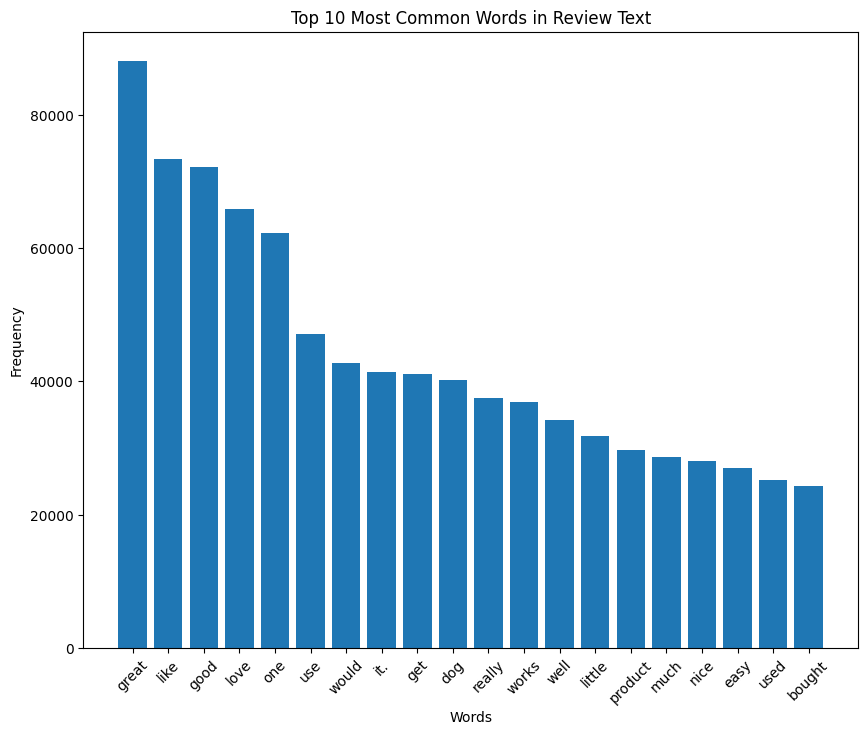

In [109]:
# Step 2: Most common words
most_common_words = word_counts.most_common(20)

# Step 3: Prepare data for plotting
words, counts = zip(*most_common_words)

# Step 4: Create bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Words in Review Text')
plt.show()

In [111]:
# let's try by ratings

import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and count words, excluding stopwords
def count_words(text_series):
    word_counts = Counter(word for review in text_series for word in review.lower().split() if word not in stop_words)
    return word_counts.most_common(10)

# Group DataFrame by 'rating', then apply text processing to 'reviewText'
common_words_per_rating = df.groupby('rating')['reviewText'].apply(lambda texts: count_words(texts))

common_words_per_rating


[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


rating
1    [(like, 5770), (one, 5485), (would, 4704), (it., 3645), (get, 3579), (even, 3425), (dog, 3387), (product, 2871), (us...
2    [(like, 4975), (one, 3781), (would, 3549), (it., 2947), (get, 2831), (dog, 2358), (use, 2251), (good, 2223), (really...
3    [(like, 8251), (would, 5854), (one, 5779), (good, 5536), (get, 4704), (use, 4182), (it., 4154), (really, 3896), (dog...
4    [(good, 15712), (like, 14239), (one, 9987), (great, 9456), (would, 8563), (use, 7689), (little, 7537), (get, 7382), ...
5    [(great, 73619), (love, 57011), (good, 46392), (like, 40180), (one, 37204), (use, 30362), (works, 27049), (dog, 2506...
Name: reviewText, dtype: object

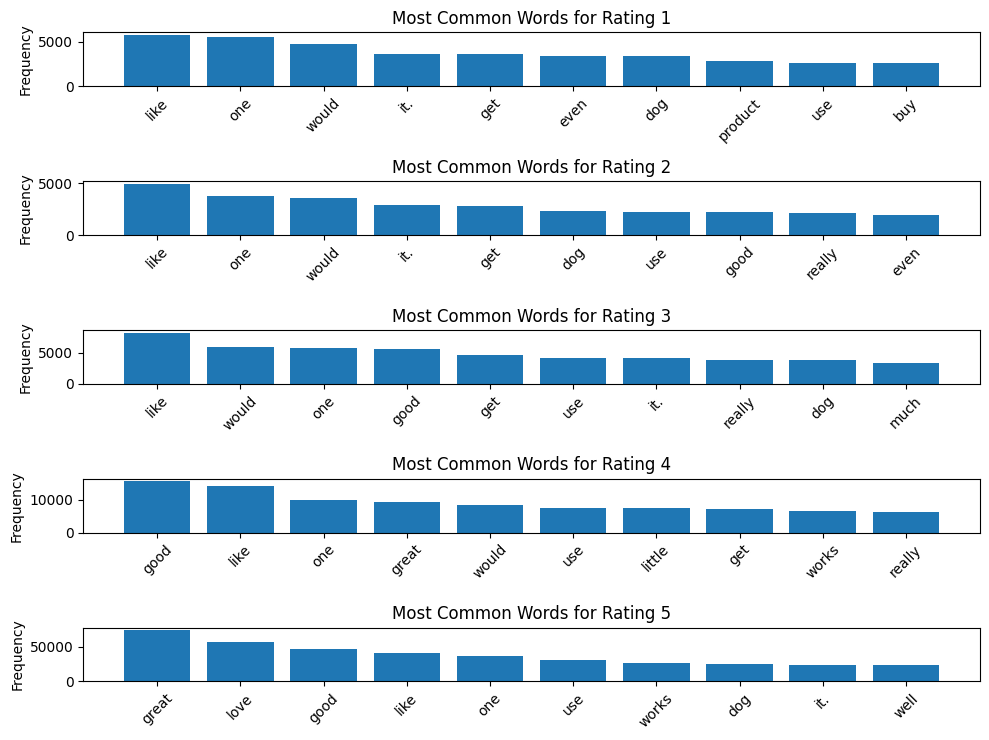

In [115]:
import matplotlib.pyplot as plt

# Assuming common_words_per_rating contains the most common words for each rating
# Create a figure with subplots - adjust the layout based on your number of ratings
fig, axes = plt.subplots(nrows=len(common_words_per_rating), ncols=1, figsize=(10, 1.5 * len(common_words_per_rating)))

# Check if there's only one rating to adjust the indexing
if len(common_words_per_rating) == 1:
    axes = [axes]

for ax, (rating, common_words) in zip(axes, common_words_per_rating.items()):
    words, counts = zip(*common_words)
    ax.bar(words, counts)
    ax.set_title(f'Most Common Words for Rating {rating}')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [116]:
# model time - first let's work with 1% of the data to start
mini_df = df.sample(frac=0.01, random_state=42)
mini_df

,rating,reviewText
408526,5,"Love xylitol, a good substitute for white sugar, made from birch trees, in the USA."
425914,5,Perfect fit and quite affordable\n\nt
369802,3,Not much of a taste to them
258448,5,Love it and it really works!!!
52413,5,Sturdy. Better than what I expected for the price.
...,...,...
185709,5,1/4 cup chips\n1/2 tsp. coconut oil\nMelt 1 min or less in microwave\nadd\n1 1/2 cups raisins.\nput on parchment pap...
380810,4,Office supplies
433509,5,This is a great mat to have at our front door. Traps dirt outside and has cut down on the amount getting tracked in...
111857,5,Item as described. Reasonable cost.


In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv('../data/amazon_reviews_reviewText_ratings.csv')
mini_df = df.sample(frac=0.01, random_state=42)
mini_df

,rating,reviewText
359522,5,"Love xylitol, a good substitute for white suga..."
374914,5,Perfect fit and quite affordable\n\nt
325093,3,Not much of a taste to them
227287,5,Love it and it really works!!!
46355,5,Sturdy. Better than what I expected for the p...
...,...,...
163534,5,1/4 cup chips\n1/2 tsp. coconut oil\nMelt 1 mi...
334820,4,Office supplies
382131,5,This is a great mat to have at our front door....
98748,5,Item as described. Reasonable cost.
